<a href="https://colab.research.google.com/github/sarnavadatta/Email-Marketing/blob/main/Predictive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.5 MB/s 
     |████████████████████████████████| 199 kB 44.7 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
import imblearn
from imblearn.combine import SMOTEENN 

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DS projects/Metyis/data01.csv',sep=",")
x=df['history_segment'].str.replace('[^0-9]', '', regex=True).astype('int64')
category=pd.DataFrame(np.floor(x/1000000))
category[:]=np.where(category > 10, 6, category)

df['Categorization']=category
df=df.drop(columns=['history_segment'],axis=1)

df.loc[df['Categorization'] < 1, 'Categorization'] = 1
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Categorization
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,2.0
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,3.0
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,2.0
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,5.0
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0,2.0
63996,5,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0,1.0
63997,6,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0,1.0
63998,1,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0,5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# define ordinal encoding
encoder = LabelEncoder()
# transform data

# Rural: 0, Surburban: 1, Urban:2
df['zip_code'] = encoder.fit_transform(df['zip_code']) 

# Multichannel: 0, Phone: 1, Web:2
df['channel'] = encoder.fit_transform(df['channel'])

# Mens Email: 0, No Email:1, Womens Email: 2
df['segment'] = encoder.fit_transform(df['segment'])

In [ ]:
#import sklearn method to split training data
from sklearn.model_selection import train_test_split

# using your variable names
df_sample, df_testing = train_test_split(df, test_size = 0.3)

In [ ]:
df_sample[df_sample["visit"]==1].groupby(['segment']).mean()

,recency,history,mens,womens,zip_code,newbie,channel,visit,conversion,spend,Categorization
segment,,,,,,,,,,,
0,5.143014,279.554096,0.604327,0.571324,1.200953,0.423542,1.331500,1.0,0.066373,7.488640,2.544554
1,4.780234,293.024181,0.596229,0.574772,1.157347,0.388817,1.333550,1.0,0.058518,6.453706,2.598179
2,5.250442,278.232231,0.489841,0.670495,1.197880,0.428445,1.334806,1.0,0.055212,7.244929,2.546820


In [ ]:
df_sample['visit'].mean(), df_sample['conversion'].mean()

(0.14573660714285713, 0.008839285714285714)

In [ ]:
df_MensEmail=df_sample[df_sample["segment"]==0]
df_NoEmail=df_sample[df_sample["segment"]==1]
df_WomensEmail=df_sample[df_sample["segment"]==2]

**Analysis of MensEmail dataframe**

In [ ]:
X=df_MensEmail.drop(['visit','conversion','spend','history','segment'], axis=1)
y=df_MensEmail['visit']

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_MensEmail = RandomForestClassifier(n_estimators=48)
rf_MensEmail.fit(xr_train,yr_train)
yr_pred_rf = rf_MensEmail.predict(xr_test)

score_rf = round(accuracy_score(yr_pred_rf,yr_test)*100,2)
print("The accuracy score achieved using random forest is: "+str(score_rf)+" %")

f1_rf=round(f1_score(yr_test,yr_pred_rf)*100,2)
print("The f1 score achieved using random forest is: "+str(f1_rf)+" %")

print(confusion_matrix(yr_test,yr_pred_rf))
print(metrics.classification_report(yr_test, yr_pred_rf))

The accuracy score achieved using random forest is: 93.95 %
The f1 score achieved using random forest is: 88.23 %
[[1403   34]
 [  85  446]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1437
           1       0.93      0.84      0.88       531

    accuracy                           0.94      1968
   macro avg       0.94      0.91      0.92      1968
weighted avg       0.94      0.94      0.94      1968



In [ ]:
# Train and tune a random forest classifer 
rf_params = {'n_estimators':[40,50,60,70,80],
             'criterion':['gini','entropy'],
             'max_features':['auto','log2'],
             'min_samples_leaf':[1,2,5,10],
             'min_samples_split':[2, 3, 5,10]}
rf_clf = GridSearchCV(RandomForestClassifier(),rf_params, scoring = 'roc_auc')
rf_clf.fit(xr_train,yr_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [40, 50, 60, 70, 80]},
             scoring='roc_auc')

In [ ]:
rf_clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [ ]:
rf_clf.best_score_

0.9646868044082657

In [ ]:
rf_MensEmail = RandomForestClassifier(criterion = 'gini',
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators= 80)
rf_MensEmail.fit(xr_train,yr_train)
yr_pred_rf = rf_MensEmail.predict(xr_test)

score_rf = round(accuracy_score(yr_pred_rf,yr_test)*100,2)
print("The accuracy score achieved using random forest is: "+str(score_rf)+" %")

f1_rf=round(f1_score(yr_test,yr_pred_rf)*100,2)
print("The f1 score achieved using random forest is: "+str(f1_rf)+" %")

print(confusion_matrix(yr_test,yr_pred_rf))
print(metrics.classification_report(yr_test, yr_pred_rf))

The accuracy score achieved using random forest is: 94.11 %
The f1 score achieved using random forest is: 88.54 %
[[1404   33]
 [  83  448]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1437
           1       0.93      0.84      0.89       531

    accuracy                           0.94      1968
   macro avg       0.94      0.91      0.92      1968
weighted avg       0.94      0.94      0.94      1968



**Analysis of NoEmail dataframe**

In [ ]:
X=df_NoEmail.drop(['visit','conversion','spend','history','segment'], axis=1)
y=df_NoEmail['visit']

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
# Train and tune a random forest classifer 
rf_params = {'n_estimators':[40,50,60,70,80],
             'criterion':['gini','entropy'],
             'max_features':['auto','log2'],
             'min_samples_leaf':[1,2,5,10],
             'min_samples_split':[2, 3, 5,10]}
rf_clf = GridSearchCV(RandomForestClassifier(),rf_params, scoring = 'roc_auc')
rf_clf.fit(xr_train,yr_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [40, 50, 60, 70, 80]},
             scoring='roc_auc')

In [ ]:
rf_clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [ ]:
rf_NoEmail = RandomForestClassifier(criterion = 'gini',
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators= 70)
rf_NoEmail.fit(xr_train,yr_train)
yr_pred_rf = rf_NoEmail.predict(xr_test)

score_rf = round(accuracy_score(yr_pred_rf,yr_test)*100,2)
print("The accuracy score achieved using random forest is: "+str(score_rf)+" %")

f1_rf=round(f1_score(yr_test,yr_pred_rf)*100,2)
print("The f1 score achieved using random forest is: "+str(f1_rf)+" %")

print(confusion_matrix(yr_test,yr_pred_rf))
print(metrics.classification_report(yr_test, yr_pred_rf))

The accuracy score achieved using random forest is: 88.37 %
The f1 score achieved using random forest is: 82.66 %
[[1768  107]
 [ 232  808]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1875
           1       0.88      0.78      0.83      1040

    accuracy                           0.88      2915
   macro avg       0.88      0.86      0.87      2915
weighted avg       0.88      0.88      0.88      2915



**Analysis of WomensEmail**

In [ ]:
X=df_WomensEmail.drop(['visit','conversion','spend','history','segment'], axis=1)
y=df_WomensEmail['visit']

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
# Train and tune a random forest classifer 
rf_params = {'n_estimators':[40,50,60,70,80],
             'criterion':['gini','entropy'],
             'max_features':['auto','log2'],
             'min_samples_leaf':[1,2,5,10],
             'min_samples_split':[2, 3, 5,10]}
rf_clf = GridSearchCV(RandomForestClassifier(),rf_params, scoring = 'roc_auc')
rf_clf.fit(xr_train,yr_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [40, 50, 60, 70, 80]},
             scoring='roc_auc')

In [ ]:
rf_clf.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [ ]:
rf_WomensEmail = RandomForestClassifier(criterion = 'entropy',
                            max_features = 'log2',
                            min_samples_leaf = 1,
                            min_samples_split = 3,
                            n_estimators= 70)
rf_WomensEmail.fit(xr_train,yr_train)
yr_pred_rf = rf_WomensEmail.predict(xr_test)

score_rf = round(accuracy_score(yr_pred_rf,yr_test)*100,2)
print("The accuracy score achieved using random forest is: "+str(score_rf)+" %")

f1_rf=round(f1_score(yr_test,yr_pred_rf)*100,2)
print("The f1 score achieved using random forest is: "+str(f1_rf)+" %")

print(confusion_matrix(yr_test,yr_pred_rf))
print(metrics.classification_report(yr_test, yr_pred_rf))

The accuracy score achieved using random forest is: 91.93 %
The f1 score achieved using random forest is: 84.9 %
[[1552   54]
 [ 127  509]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1606
           1       0.90      0.80      0.85       636

    accuracy                           0.92      2242
   macro avg       0.91      0.88      0.90      2242
weighted avg       0.92      0.92      0.92      2242



**Model testing & Strategy**

In [ ]:
df_testing

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Categorization
60745,3,262.87,1,0,1,0,1,0,1,0,0.0,3.0
13269,7,107.47,0,1,2,1,2,2,0,0,0.0,2.0
38738,7,410.83,1,1,0,0,0,2,0,0,0.0,4.0
2809,12,287.91,0,1,0,1,2,1,0,0,0.0,3.0
2084,1,334.66,1,1,1,0,0,1,0,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20912,3,358.31,1,0,1,0,2,1,0,0,0.0,4.0
42069,4,97.77,1,0,2,1,1,1,0,0,0.0,1.0
35633,1,532.31,1,1,2,1,2,2,0,0,0.0,5.0
40534,10,179.29,0,1,2,0,2,2,0,0,0.0,2.0


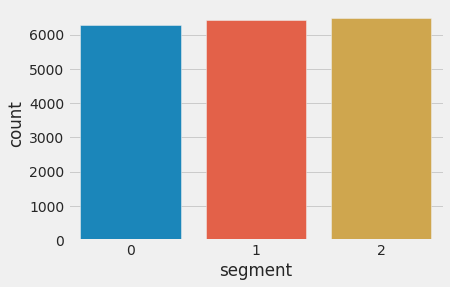

In [ ]:
sns.countplot(x="segment", data=df_testing)

In [ ]:
df_testing_1=df_testing.drop(['visit','conversion','spend','history','segment'], axis=1)
df_testing_2=df_testing.drop(['visit','conversion','spend','history','segment'], axis=1)
df_testing_3=df_testing.drop(['visit','conversion','spend','history','segment'], axis=1)

In [ ]:
x1=pd.DataFrame(rf_MensEmail.predict(df_testing_1), columns = ['MensEmail'])
x2=pd.DataFrame(rf_NoEmail.predict(df_testing_2), columns = ['NoEmail'])
x3=pd.DataFrame(rf_WomensEmail.predict(df_testing_3), columns = ['WomensEmail'])

In [ ]:
dfx=df_testing.reset_index().drop(['index'],axis=1)
dfx=pd.concat([dfx,x1,x2,x3], axis=1)
dfx

,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Categorization,MensEmail,NoEmail,WomensEmail
0,3,262.87,1,0,1,0,1,0,1,0,0.0,3.0,0,1,0
1,7,107.47,0,1,2,1,2,2,0,0,0.0,2.0,0,0,0
2,7,410.83,1,1,0,0,0,2,0,0,0.0,4.0,1,0,0
3,12,287.91,0,1,0,1,2,1,0,0,0.0,3.0,0,0,0
4,1,334.66,1,1,1,0,0,1,0,0,0.0,3.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,3,358.31,1,0,1,0,2,1,0,0,0.0,4.0,1,0,1
19196,4,97.77,1,0,2,1,1,1,0,0,0.0,1.0,0,0,0
19197,1,532.31,1,1,2,1,2,2,0,0,0.0,5.0,0,0,0
19198,10,179.29,0,1,2,0,2,2,0,0,0.0,2.0,0,0,1


In [ ]:
conditions = [
    (dfx["MensEmail"] == 1),
    (dfx["NoEmail"] > dfx["MensEmail"]) & (dfx["NoEmail"] > dfx["WomensEmail"]),
    (dfx["WomensEmail"] > dfx["MensEmail"]) & (dfx["WomensEmail"] >= dfx["NoEmail"])
    ]
choices = [0, 1, 2]
dfx["decision"]=np.select(conditions, choices, default=1)

In [ ]:
len(dfx[dfx["decision"]==0]), len(dfx[dfx["decision"]==1]), len(dfx[dfx["decision"]==2])

(5721, 10315, 3164)

In [ ]:
# expected earnings using our model
Expected_earnings=len(dfx[dfx["decision"]==0])*7.45+len(dfx[dfx["decision"]==1])*6.45+len(dfx[dfx["decision"]==2])*7.24

In [ ]:
Expected_earnings-dfx['spend'].sum() # more earning using ML model compare to random sending of email

111552.26999999999

In [ ]:
(Expected_earnings-dfx['spend'].sum())/dfx['spend'].sum() # we see a gain of 543%

5.439374516354118